In [1]:
#Import Libraries

#for reading and data-manipulation
import os
import numpy as np
import pandas as pd

In [2]:
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [3]:
#for data preprocessing
import time
from contractions import contractions_dict
import re
from collections import Counter
from wordcloud import STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# for ML model Implementation
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from bertopic import BERTopic


In [6]:
from umap import UMAP

In [7]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
# warnings.simplefilter("ignore", category=SettingWithCopyWarning)


In [40]:
df = pd.read_csv('GlobalNewsDataset/data.csv', encoding='ISO-8859-1')
df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOããã¯ã³ã©ã³ã¯ä¸ã®å¤§äººã£ã...,[æ ªå¼ä¼ç¤¾Ainer]\nRANDEBOOï¼ã©ã³ããã...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal Â UN Secretary-General Antoni...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [41]:
# To filter the DataFrame to include only records where the category column falls under the specified categories 
# (Stock, Health, Finance, Technology, Real estate), you can use the following code:
# Define the list of categories you want to keep
categories_to_keep = ['Stock', 'Health', 'Finance', 'Technology', 'Real estate']

# Filter the DataFrame to include only rows where the category is in the specified list
df_filtered = df[df['category'].isin(categories_to_keep)]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13718 entries, 1280 to 104592
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    13718 non-null  int64 
 1   source_id     2884 non-null   object
 2   source_name   13718 non-null  object
 3   author        13349 non-null  object
 4   title         13718 non-null  object
 5   description   13588 non-null  object
 6   url           13718 non-null  object
 7   url_to_image  13220 non-null  object
 8   published_at  13718 non-null  object
 9   content       13718 non-null  object
 10  category      13718 non-null  object
 11  full_content  11517 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


In [42]:
df = df_filtered.rename(columns={'article_id': 'unique_identifier', 'content': 'brief_review'})

In [43]:
df = df[['unique_identifier', 'brief_review', 'category']].dropna()

In [44]:
df.head()

,unique_identifier,brief_review,category
1280,93416,WeWork has seen a dramatic fall from grace sin...,Real estate
1289,93553,Orlando real estate agent and content creator ...,Real estate
1446,93427,"Using survey data, responses from community bo...",Real estate
2098,93467,Were excited to announce our participation in ...,Real estate
2107,93468,GalÃ¡pagos Giant Tortoises Are Ecosystem Engin...,Real estate


In [45]:
# Sample 400 records from each category
df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(800, random_state=42))

# Display the sampled data info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 54879 to 93760
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  4000 non-null   int64 
 1   brief_review       4000 non-null   object
 2   category           4000 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.0+ KB


In [46]:
df.category.value_counts()

category
Finance        800
Health         800
Real estate    800
Stock          800
Technology     800
Name: count, dtype: int64

In [47]:
# Handling missing values
df.isnull().sum()

unique_identifier    0
brief_review         0
category             0
dtype: int64

In [48]:
#handling duplicate values 
len(df[df.duplicated(subset=['brief_review'])])

228

In [49]:
len(df[df.duplicated(subset=['unique_identifier'])])

97

In [50]:
# Drop duplicate 
df_cleaned = df.drop_duplicates(subset = ["brief_review", "unique_identifier"])
print(df_cleaned.head())

       unique_identifier                                       brief_review  \
54879             123984  The benchmark Nifty 50 started the session on ...   
11877             112963  Reported Standalone quarterly numbers for Dabu...   
75755             302235  Andra AP fonden raised its stake in CarMax, In...   
83139             367656  Shares of Manappuram Finance jumped 10% on Wed...   
54935             124065  HBS faculty comprises more than 300 scholars a...   

      category  
54879  Finance  
11877  Finance  
75755  Finance  
83139  Finance  
54935  Finance  


In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3903 entries, 54879 to 93760
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  3903 non-null   int64 
 1   brief_review       3903 non-null   object
 2   category           3903 non-null   object
dtypes: int64(1), object(2)
memory usage: 122.0+ KB


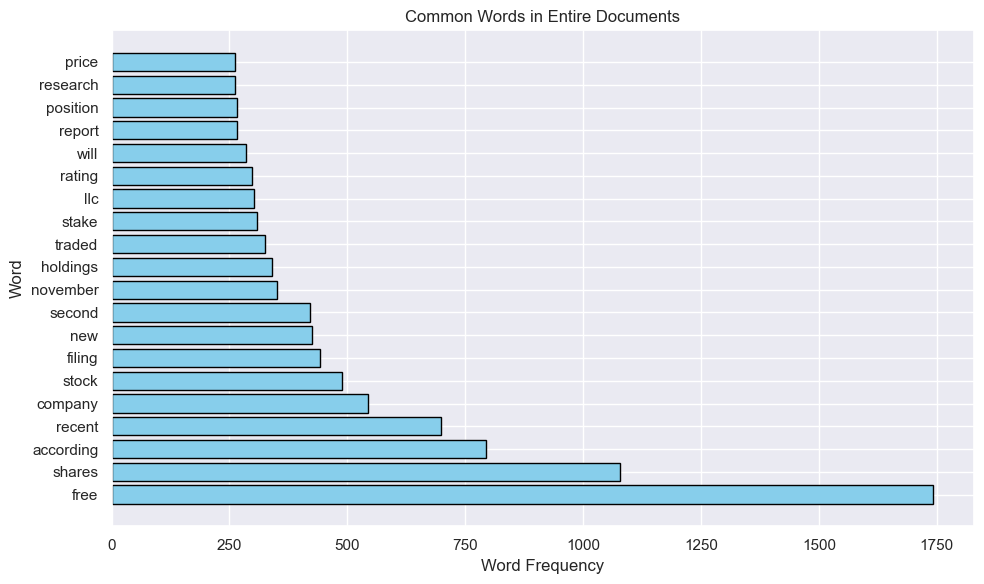

In [52]:
#visualization for common words in entire documents
# Chart - 4 visualization code

# Combine all article content across categories
combined_content = ' '.join(df_cleaned['brief_review'])

#convert the whole content in lowercase
combined_content = combined_content.lower()

# Tokenize the combined content
tokens = combined_content.split()

# Filter out stopwords and non-alphanumeric words
filtered_tokens = [word for word in tokens if word.isalpha() and word not in STOPWORDS]

# Create a Counter to count word frequencies
word_counter = Counter(filtered_tokens)

# Choose the number of most common words to visualize
num_common_words = 20
common_words = word_counter.most_common(num_common_words)

# Create a bar plot for common words
plt.figure(figsize=(10, 6))
plt.barh([word[0] for word in common_words], [count[1] for count in common_words], color='skyblue', edgecolor='black')
plt.title('Common Words in Entire Documents')
plt.xlabel('Word Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Display the plot
plt.show()

In [53]:
# Expand Contraction

# Function to expand contractions using the contractions_dict
def expand_contractions(text):
    # Regular expression pattern to match contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded = contractions_dict.get(match.lower())
        return expanded

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Apply the expand_contractions function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(expand_contractions)

In [54]:
# Convert text in the "brief_review" column to lowercase
df_cleaned['brief_review'] = df_cleaned['brief_review'].str.lower()

In [55]:
# Remove Punctuations

# Function to remove punctuations from text
def remove_punctuations(text):
    # Create a translation table to remove punctuations
    translator = str.maketrans('', '', string.punctuation +'\n')

    # Apply the translation table to remove punctuations
    text_without_punctuations = text.translate(translator)
    return text_without_punctuations

# Apply the remove_punctuations function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_punctuations)

In [56]:
# Function to remove URLs from text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url_pattern, '', text)

# Function to remove words containing digits from text
def remove_words_with_digits(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

# Function to remove non-ASCII characters (special characters)
def remove_special_characters(text):
    # Replace non-ASCII characters with a space
    return re.sub(r'[^\x00-\x7F]+', ' ', text)

# Apply the remove_urls function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_urls)

# Apply the remove_words_with_digits function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_words_with_digits)

# Apply the remove_special_characters function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_special_characters)

# Verify the cleaned data
df_cleaned['brief_review'].head()


54879    the bench nifty started the session on a posit...
11877    reported standalone quarterly numbers for dabu...
75755    andra ap fonden raised its stake in carmax inc...
83139    shares of manappuram finance jumped on wednesd...
54935    hbs faculty comprises more than scholars and p...
Name: brief_review, dtype: object

In [25]:
#  # Remove Stopwords
# # Download the list of stopwords if not already downloaded
# nltk.download('stopwords')

# # Get the list of English stopwords
# stop_words = set(stopwords.words('english'))

# # Add unnecessary words to the list of English stopwords
# stop_unnecessary_words = stop_words.union(set(['mr', 'people', 'would', 'year', 'said', 'say', 'also', 'wale', 'could', 'chars']))


# # Function to remove stopwords from text
# def remove_stopwords(text):
#     words = text.split()
#     words = [word for word in words if len(word)>2]
#     filtered_words = [word for word in words if word.lower() not in stop_unnecessary_words]
#     return ' '.join(filtered_words)

# # Apply the remove_stopwords function to the "brief_review" column
# df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_stopwords)

In [57]:
# Remove white spaces from the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].str.replace('\s+', ' ', regex=True)

In [58]:
#Since BERTopic uses embeddings from transformer models (e.g., BERT), it naturally captures the semantics and context of words. 
# So, advanced preprocessing steps like tokenization, stemming, or lemmatization are usually unnecessary and can sometimes 
# reduce the quality of embeddings.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 54879 to 93760
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  4000 non-null   int64 
 1   brief_review       4000 non-null   object
 2   category           4000 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.0+ KB


In [60]:
# We need to convert the df (series) to list for passing to BERTopic.
sentenceList = df["brief_review"].tolist()
samplesentenceList = sentenceList[1:4001]

In [61]:
len(samplesentenceList)

3999

In [62]:
dim_model = PCA(n_components=5)
# cluster_model = KMeans(n_clusters=5)

topic_model = BERTopic(umap_model=dim_model, embedding_model="allenai-specter", calculate_probabilities=True)


In [63]:
topics, probabilities = topic_model.fit_transform(samplesentenceList)

/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/hdbscan/prediction.py:663: RuntimeWarning:

invalid value encountered in scalar divide



In [64]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3561,-1_the_chars_in_of,"[the, chars, in, of, to, its, report, free, an...",[Rhumbline Advisers raised its holdings in sha...
1,0,131,0_report_on_free_stock,"[report, on, free, stock, get, shares, rating,...",[StockNews.com upgraded shares of TransDigm Gr...
2,1,89,1_its_in_quarter_the,"[its, in, quarter, the, according, most, recen...",[Envestnet Asset Management Inc. grew its stak...
3,2,35,2_821_transmit_browsing_collect,"[821, transmit, browsing, collect, stored, pro...",[When browsing with ads:\nWe collect personal ...
4,3,32,3_ipo_strictures_endthe_658,"[ipo, strictures, endthe, 658, enthusiasm, mut...",[Strictures Leave IPO Financing at a Dead EndT...
5,4,27,4_health_teladoc_the_has,"[health, teladoc, the, has, carter, murthy, tv...","[Iran Press TV\nMonday, 06 November 2023 3:32 ..."
6,5,23,5_hamas_the_on_gaza,"[hamas, the, on, gaza, of, israel, and, israel...",[7 November 2023 - A month since Hamas militan...
7,6,20,6_lenders_promoter_underlying_lien,"[lenders, promoter, underlying, lien, guarante...",[Lenders Look to De risk Promoter GuaranteesIn...
8,7,19,7_put_the_const_samsung,"[put, the, const, samsung, here, text, chars, ...",[Oddity Tech (NASDAQ:ODD â Get Free Report) ...
9,8,18,8_technology_get_report_the,"[technology, get, report, the, earnings, guida...",[Silicon Motion Technology (NASDAQ:SIMO â Ge...


In [65]:
topic_df= topic_model.get_topic_info()

In [66]:
topic_df["Count"].sum()

3999

In [67]:
# Visualize topic similarity using a 2D representation
topic_model.visualize_topics()

In [68]:

# Or, to visualize hierarchical relationships between topics
topic_model.visualize_hierarchy()

In [69]:
# from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Get the top words for each topic
topic_words = [[word for word, _ in words] for words in topic_model.get_topics().values()]

# Tokenize your documents
tokenized_docs = [doc.split() for doc in samplesentenceList]

# Create a dictionary from the tokenized documents
dictionary = Dictionary(tokenized_docs)

# Calculate coherence using the 'c_v' measure
coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Topic Coherence Score: {coherence_score}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35:

Topic Coherence Score: 0.48411357334395944


In [70]:
def topic_diversity(topic_words):
    unique_words = set([word for topic in topic_words for word in topic])
    total_words = sum(len(topic) for topic in topic_words)
    return len(unique_words) / total_words

# Calculate diversity
diversity_score = topic_diversity(topic_words)
print(f"Topic Diversity Score: {diversity_score}")


Topic Diversity Score: 0.7538461538461538
